## **Importing Libraries**
---
The required libraries are imported here. Their functions are explained as comments.

In [ ]:
import numpy as np # numpy
import pandas as pd # pandas
import logging # logging for Word2Vec
from tqdm.auto import tqdm # very nice progress bar
import networkx as nx # networkx for building the final graph

from gensim.models import Word2Vec, KeyedVectors # Word2Vec model
from matplotlib import pyplot as plt # plotting graphs

## **Building Word Vectors**
---
A Word2Vec model is used to construct Word Vectors of size 128. Word Vectors are constructed for words occuring over 50 times in the corpus.

In [ ]:
class Sentences(object):
    '''
    A Sentences class to return each sentence from the corpus as a list of words without having to load the whole corpus into memory
    '''
    def __init__(self, fname):
        self.fname = fname
 
    def __iter__(self):
        for line in open(self.fname):
            yield line.split()
                
sentences = Sentences('corpus.txt')

In [ ]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
model = Word2Vec(vector_size=128, window=5, min_count=50, hs = 1, sg = 1, workers = 10)

2022-05-14 23:08:58,963 : INFO : Word2Vec lifecycle event {'params': 'Word2Vec<vocab=0, vector_size=128, alpha=0.025>', 'datetime': '2022-05-14T23:08:58.962850', 'gensim': '4.2.0', 'python': '3.10.4 (tags/v3.10.4:9d38120, Mar 23 2022, 23:13:41) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19044-SP0', 'event': 'created'}


In [ ]:
model.build_vocab(sentences)

2022-05-14 23:08:58,975 : INFO : collecting all words and their counts
2022-05-14 23:08:58,977 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-05-14 23:08:59,014 : INFO : PROGRESS: at sentence #10000, processed 154848 words, keeping 15737 word types
2022-05-14 23:08:59,051 : INFO : PROGRESS: at sentence #20000, processed 308461 words, keeping 24172 word types
2022-05-14 23:08:59,087 : INFO : PROGRESS: at sentence #30000, processed 463959 words, keeping 30630 word types
2022-05-14 23:08:59,125 : INFO : PROGRESS: at sentence #40000, processed 620028 words, keeping 36355 word types
2022-05-14 23:08:59,164 : INFO : PROGRESS: at sentence #50000, processed 775442 words, keeping 41344 word types
2022-05-14 23:08:59,207 : INFO : PROGRESS: at sentence #60000, processed 928374 words, keeping 46877 word types
2022-05-14 23:08:59,247 : INFO : PROGRESS: at sentence #70000, processed 1081517 words, keeping 53151 word types
2022-05-14 23:08:59,286 : INFO : PROGRESS: at

2022-05-14 23:09:01,717 : INFO : PROGRESS: at sentence #720000, processed 11084047 words, keeping 244119 word types
2022-05-14 23:09:01,755 : INFO : PROGRESS: at sentence #730000, processed 11236910 words, keeping 246004 word types
2022-05-14 23:09:01,797 : INFO : PROGRESS: at sentence #740000, processed 11390750 words, keeping 248344 word types
2022-05-14 23:09:01,838 : INFO : PROGRESS: at sentence #750000, processed 11543716 words, keeping 252036 word types
2022-05-14 23:09:01,881 : INFO : PROGRESS: at sentence #760000, processed 11697485 words, keeping 254026 word types
2022-05-14 23:09:01,919 : INFO : PROGRESS: at sentence #770000, processed 11851252 words, keeping 256564 word types
2022-05-14 23:09:01,956 : INFO : PROGRESS: at sentence #780000, processed 12007561 words, keeping 258612 word types
2022-05-14 23:09:01,998 : INFO : PROGRESS: at sentence #790000, processed 12165757 words, keeping 260693 word types
2022-05-14 23:09:02,036 : INFO : PROGRESS: at sentence #800000, processe

2022-05-14 23:09:04,292 : INFO : PROGRESS: at sentence #1430000, processed 22006284 words, keeping 390730 word types
2022-05-14 23:09:04,327 : INFO : PROGRESS: at sentence #1440000, processed 22161418 words, keeping 393345 word types
2022-05-14 23:09:04,361 : INFO : PROGRESS: at sentence #1450000, processed 22315415 words, keeping 395046 word types
2022-05-14 23:09:04,396 : INFO : PROGRESS: at sentence #1460000, processed 22468464 words, keeping 396632 word types
2022-05-14 23:09:04,431 : INFO : PROGRESS: at sentence #1470000, processed 22622867 words, keeping 398897 word types
2022-05-14 23:09:04,465 : INFO : PROGRESS: at sentence #1480000, processed 22776614 words, keeping 401276 word types
2022-05-14 23:09:04,500 : INFO : PROGRESS: at sentence #1490000, processed 22932095 words, keeping 403120 word types
2022-05-14 23:09:04,533 : INFO : PROGRESS: at sentence #1500000, processed 23086064 words, keeping 404802 word types
2022-05-14 23:09:04,567 : INFO : PROGRESS: at sentence #1510000,

In [ ]:
model.train(sentences, total_examples=model.corpus_count, epochs = 10)

2022-05-14 23:09:06,133 : INFO : Word2Vec lifecycle event {'msg': 'training model with 10 workers on 19705 vocabulary and 128 features, using sg=1 hs=1 sample=0.001 negative=5 window=5 shrink_windows=True', 'datetime': '2022-05-14T23:09:06.133000', 'gensim': '4.2.0', 'python': '3.10.4 (tags/v3.10.4:9d38120, Mar 23 2022, 23:13:41) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19044-SP0', 'event': 'train'}
2022-05-14 23:09:07,173 : INFO : EPOCH 0 - PROGRESS: at 2.56% examples, 480335 words/s, in_qsize 19, out_qsize 0
2022-05-14 23:09:08,184 : INFO : EPOCH 0 - PROGRESS: at 4.99% examples, 471449 words/s, in_qsize 18, out_qsize 1
2022-05-14 23:09:09,191 : INFO : EPOCH 0 - PROGRESS: at 7.78% examples, 493038 words/s, in_qsize 19, out_qsize 0
2022-05-14 23:09:10,196 : INFO : EPOCH 0 - PROGRESS: at 10.53% examples, 500897 words/s, in_qsize 16, out_qsize 0
2022-05-14 23:09:11,210 : INFO : EPOCH 0 - PROGRESS: at 13.15% examples, 500476 words/s, in_qsize 19, out_qsize 0
2022-05-14 2

2022-05-14 23:10:16,754 : INFO : EPOCH 1 - PROGRESS: at 78.49% examples, 479046 words/s, in_qsize 20, out_qsize 0
2022-05-14 23:10:17,827 : INFO : EPOCH 1 - PROGRESS: at 81.01% examples, 477969 words/s, in_qsize 12, out_qsize 7
2022-05-14 23:10:18,827 : INFO : EPOCH 1 - PROGRESS: at 83.64% examples, 478737 words/s, in_qsize 19, out_qsize 0
2022-05-14 23:10:19,836 : INFO : EPOCH 1 - PROGRESS: at 86.14% examples, 478626 words/s, in_qsize 19, out_qsize 0
2022-05-14 23:10:20,843 : INFO : EPOCH 1 - PROGRESS: at 88.72% examples, 478994 words/s, in_qsize 19, out_qsize 0
2022-05-14 23:10:21,858 : INFO : EPOCH 1 - PROGRESS: at 91.14% examples, 478479 words/s, in_qsize 18, out_qsize 0
2022-05-14 23:10:22,860 : INFO : EPOCH 1 - PROGRESS: at 93.59% examples, 478371 words/s, in_qsize 19, out_qsize 0
2022-05-14 23:10:23,871 : INFO : EPOCH 1 - PROGRESS: at 96.11% examples, 478343 words/s, in_qsize 19, out_qsize 0
2022-05-14 23:10:24,907 : INFO : EPOCH 1 - PROGRESS: at 98.75% examples, 478474 words/s,

2022-05-14 23:11:28,961 : INFO : EPOCH 3 - PROGRESS: at 54.79% examples, 468036 words/s, in_qsize 19, out_qsize 0
2022-05-14 23:11:29,970 : INFO : EPOCH 3 - PROGRESS: at 57.15% examples, 467225 words/s, in_qsize 7, out_qsize 3
2022-05-14 23:11:30,981 : INFO : EPOCH 3 - PROGRESS: at 59.56% examples, 467051 words/s, in_qsize 17, out_qsize 0
2022-05-14 23:11:31,985 : INFO : EPOCH 3 - PROGRESS: at 61.96% examples, 467061 words/s, in_qsize 19, out_qsize 0
2022-05-14 23:11:32,995 : INFO : EPOCH 3 - PROGRESS: at 64.46% examples, 467412 words/s, in_qsize 15, out_qsize 0
2022-05-14 23:11:34,010 : INFO : EPOCH 3 - PROGRESS: at 66.77% examples, 466338 words/s, in_qsize 17, out_qsize 0
2022-05-14 23:11:35,024 : INFO : EPOCH 3 - PROGRESS: at 69.18% examples, 466182 words/s, in_qsize 19, out_qsize 0
2022-05-14 23:11:36,047 : INFO : EPOCH 3 - PROGRESS: at 71.63% examples, 466096 words/s, in_qsize 19, out_qsize 0
2022-05-14 23:11:37,129 : INFO : EPOCH 3 - PROGRESS: at 74.10% examples, 465093 words/s, 

2022-05-14 23:12:41,431 : INFO : EPOCH 5 - PROGRESS: at 28.82% examples, 454103 words/s, in_qsize 19, out_qsize 0
2022-05-14 23:12:42,435 : INFO : EPOCH 5 - PROGRESS: at 31.29% examples, 455384 words/s, in_qsize 18, out_qsize 0
2022-05-14 23:12:43,438 : INFO : EPOCH 5 - PROGRESS: at 33.56% examples, 453867 words/s, in_qsize 18, out_qsize 1
2022-05-14 23:12:44,445 : INFO : EPOCH 5 - PROGRESS: at 35.99% examples, 454631 words/s, in_qsize 19, out_qsize 0
2022-05-14 23:12:45,513 : INFO : EPOCH 5 - PROGRESS: at 38.53% examples, 454681 words/s, in_qsize 19, out_qsize 0
2022-05-14 23:12:46,599 : INFO : EPOCH 5 - PROGRESS: at 41.02% examples, 453602 words/s, in_qsize 8, out_qsize 9
2022-05-14 23:12:47,616 : INFO : EPOCH 5 - PROGRESS: at 43.61% examples, 455478 words/s, in_qsize 20, out_qsize 0
2022-05-14 23:12:48,646 : INFO : EPOCH 5 - PROGRESS: at 46.03% examples, 455428 words/s, in_qsize 19, out_qsize 0
2022-05-14 23:12:49,700 : INFO : EPOCH 5 - PROGRESS: at 48.50% examples, 455293 words/s, 

2022-05-14 23:13:53,746 : INFO : EPOCH 6: training on 26315570 raw words (19216109 effective words) took 42.5s, 452488 effective words/s
2022-05-14 23:13:54,845 : INFO : EPOCH 7 - PROGRESS: at 2.19% examples, 386096 words/s, in_qsize 19, out_qsize 0
2022-05-14 23:13:55,860 : INFO : EPOCH 7 - PROGRESS: at 4.61% examples, 421948 words/s, in_qsize 19, out_qsize 0
2022-05-14 23:13:56,862 : INFO : EPOCH 7 - PROGRESS: at 7.07% examples, 438676 words/s, in_qsize 16, out_qsize 0
2022-05-14 23:13:57,883 : INFO : EPOCH 7 - PROGRESS: at 9.41% examples, 440547 words/s, in_qsize 19, out_qsize 0
2022-05-14 23:13:58,893 : INFO : EPOCH 7 - PROGRESS: at 11.76% examples, 442020 words/s, in_qsize 19, out_qsize 0
2022-05-14 23:13:59,906 : INFO : EPOCH 7 - PROGRESS: at 14.19% examples, 445464 words/s, in_qsize 18, out_qsize 0
2022-05-14 23:14:00,916 : INFO : EPOCH 7 - PROGRESS: at 16.46% examples, 444070 words/s, in_qsize 15, out_qsize 2
2022-05-14 23:14:01,929 : INFO : EPOCH 7 - PROGRESS: at 18.86% exampl

2022-05-14 23:15:06,941 : INFO : EPOCH 8 - PROGRESS: at 71.07% examples, 448050 words/s, in_qsize 18, out_qsize 1
2022-05-14 23:15:07,943 : INFO : EPOCH 8 - PROGRESS: at 73.30% examples, 447483 words/s, in_qsize 19, out_qsize 0
2022-05-14 23:15:08,953 : INFO : EPOCH 8 - PROGRESS: at 75.79% examples, 448151 words/s, in_qsize 18, out_qsize 0
2022-05-14 23:15:09,959 : INFO : EPOCH 8 - PROGRESS: at 78.23% examples, 448394 words/s, in_qsize 19, out_qsize 0
2022-05-14 23:15:11,067 : INFO : EPOCH 8 - PROGRESS: at 80.79% examples, 448038 words/s, in_qsize 19, out_qsize 0
2022-05-14 23:15:12,076 : INFO : EPOCH 8 - PROGRESS: at 83.21% examples, 448470 words/s, in_qsize 17, out_qsize 0
2022-05-14 23:15:13,088 : INFO : EPOCH 8 - PROGRESS: at 85.61% examples, 448601 words/s, in_qsize 19, out_qsize 0
2022-05-14 23:15:14,103 : INFO : EPOCH 8 - PROGRESS: at 87.97% examples, 448445 words/s, in_qsize 19, out_qsize 0
2022-05-14 23:15:15,103 : INFO : EPOCH 8 - PROGRESS: at 90.20% examples, 447953 words/s,

(192177442, 263155700)

## **Building Word Similarity DataFrame**
---
The Word2Vec model is used to build a Dataframe containing the keywords and their corresponding similar words. Further the similar words corresponding to each of those words is computed and so on upto a depth of 4.

In [ ]:
def computeSimilarWords(model, keywords, n): # compute similar words upto depth 4
    columns = ['Word'] + [str(i) for i in range(1,n+1)]
    df = pd.DataFrame(data = None, columns = columns)
    
    for word in keywords:
        depth1 = [w[0] for w in model.wv.most_similar(word, topn = n)]
        df.loc[len(df)] = [word]+depth1
        
        for word1 in depth1:
            depth2 = [w[0] for w in model.wv.most_similar(word1, topn = n)]
            df.loc[len(df)] = [word1]+depth2
            
            for word2 in depth2:
                depth3 = [w[0] for w in model.wv.most_similar(word2, topn = n)]
                df.loc[len(df)] = [word2]+depth3
            
                for word3 in depth3:
                    depth4 = [w[0] for w in model.wv.most_similar(word3, topn = n)]
                    df.loc[len(df)] = [word3]+depth4
    
    df.to_csv('similarWords.csv')

In [ ]:
keywords = ['patient', 'infection', 'covid-19', 'pandemic', 'treatment', 'chemotherapy', 'protein', 'vaccine', 'quarantine', 'influenza']
computeSimilarWords(model, keywords, 5)

## **Building the Graph**
---
The Similar words dataframe is used to draw the graph following the code from the NLP moodle page.

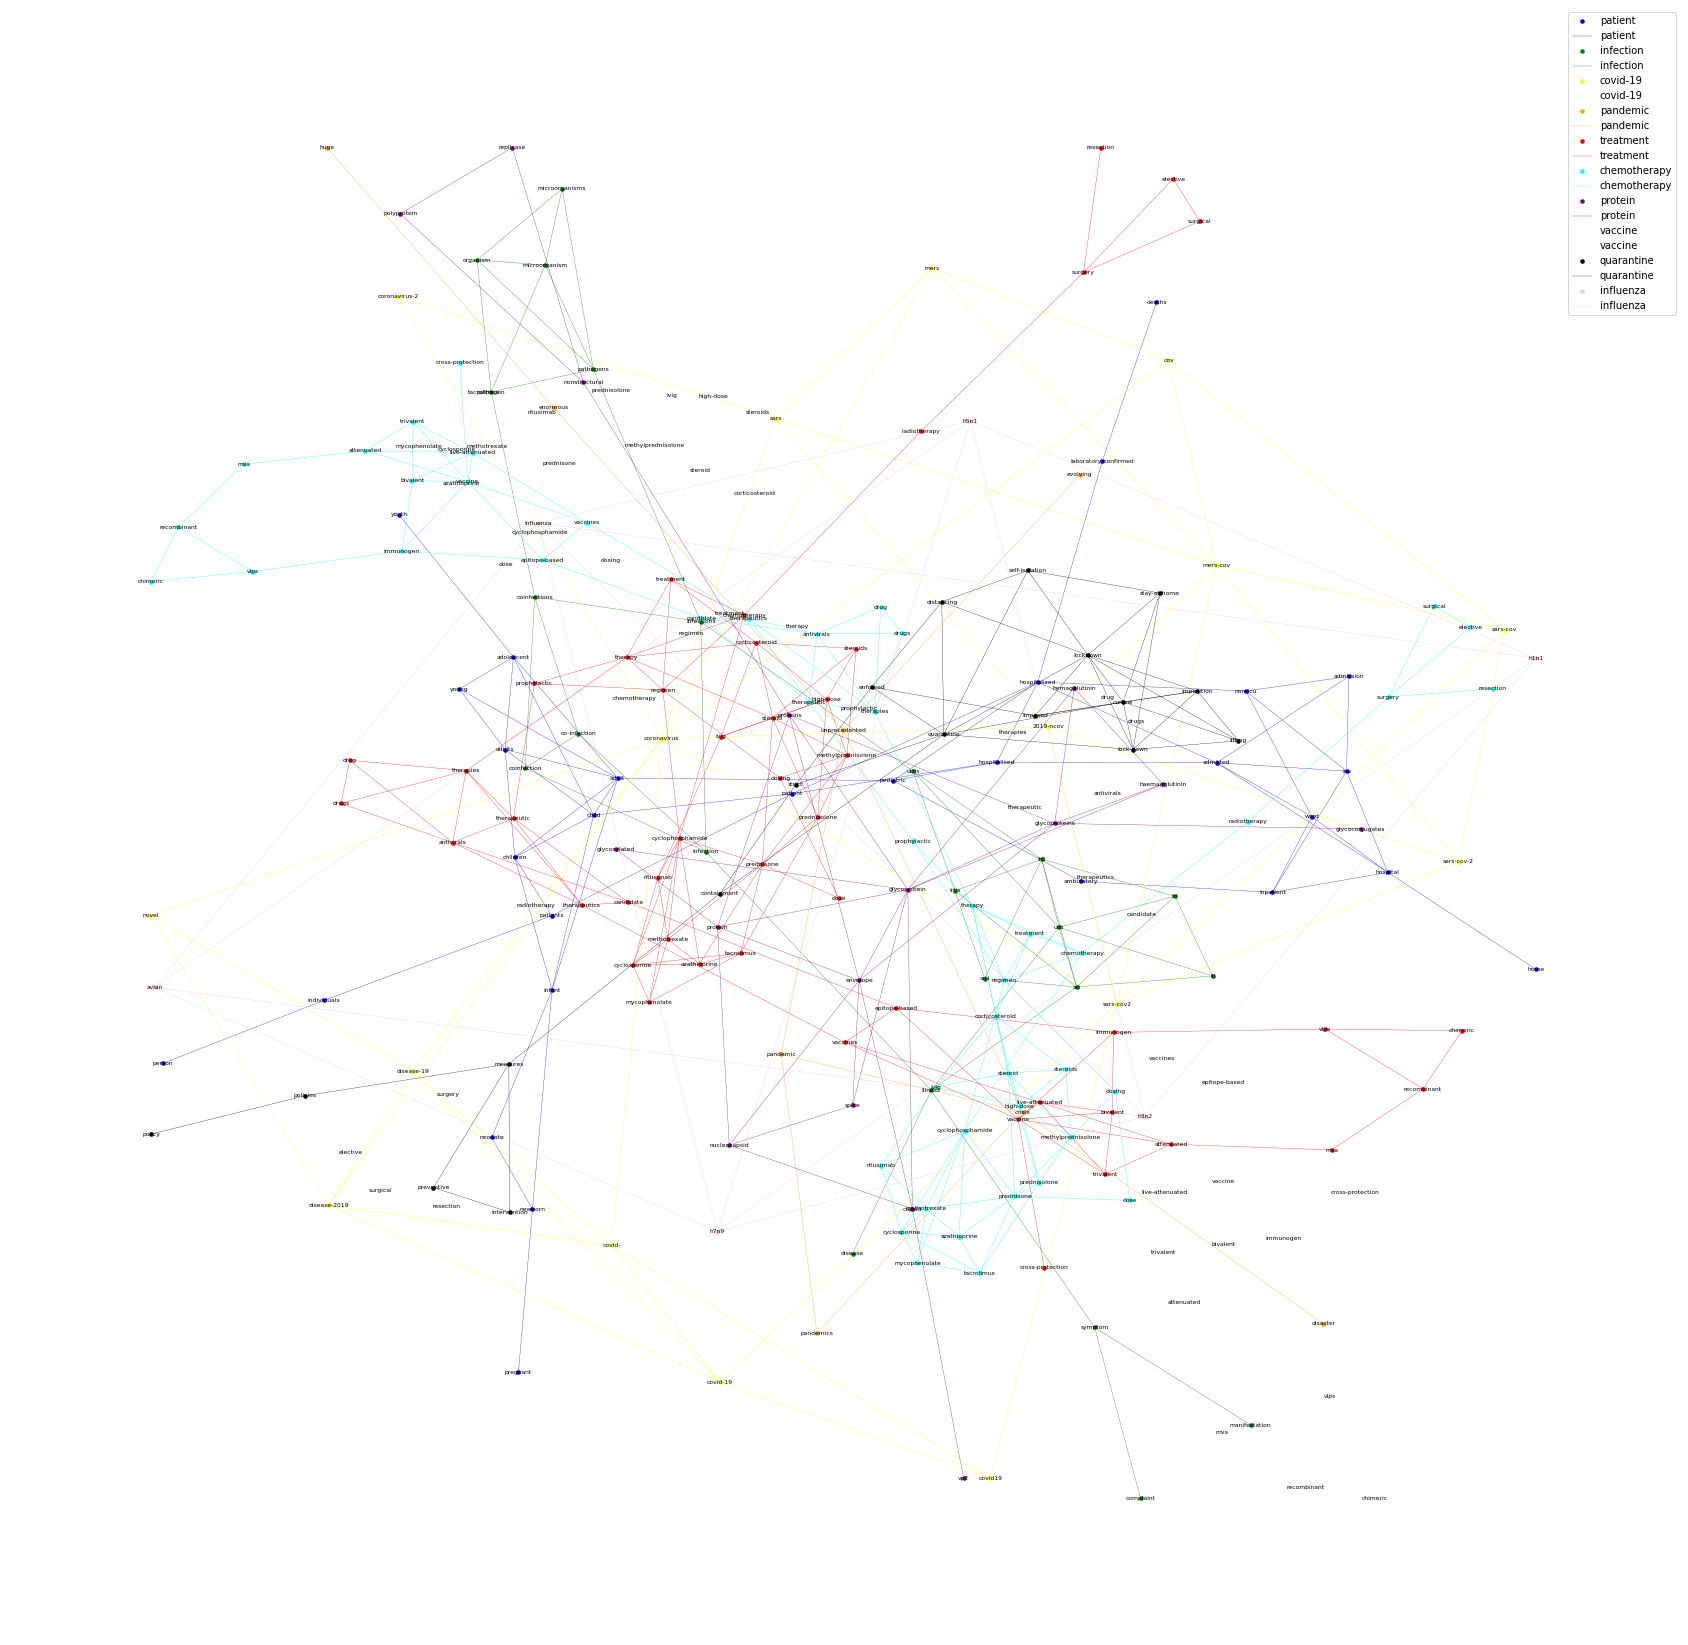

In [ ]:
words = pd.read_csv('similarWords.csv')
g = nx.cubical_graph()

#Construct the graph
#for every source word(node), add edges - connected through similarity
for i, row in words.iterrows():
    for j in range(1,len(row)):
        g.add_node(row[j])
    for j in range(2,len(row)):
        g.add_edge(row[1], row[j])    
      
G = nx.petersen_graph()
plt.subplot()
# Different options for each connected component
options1 = { 
    'node_color': 'blue',
    'node_size': 20,
    'edge_color': 'blue',
    'linewidths': 0.1,
    'width': 0.3,
    'font_size':6,
}
options2 = {
    'node_color': 'green',
    'node_size': 20,
    'edge_color': 'green',
    'linewidths': 0.1,
    'width': 0.3,
    'font_size':6,
}
options3 = {
    'node_color': 'yellow',
    'node_size': 20,
    'edge_color': 'yellow',
    'linewidths': 0.1,
    'width': 0.3,
    'font_size':6,
}
options4 = {
    'node_color': 'orange',
    'node_size': 20,
    'edge_color': 'orange',
    'linewidths': 0.1,
    'width': 0.3,
    'font_size':6,
}
options5 = {
    'node_color': 'red',
    'node_size': 20,
    'edge_color': 'red',
    'linewidths': 0.1,
    'width': 0.3,
    'font_size':6,
}
options6 = {
    'node_color': 'cyan',
    'node_size': 20,
    'edge_color': 'cyan',
    'linewidths': 0.1,
    'width': 0.3,
    'font_size':6,
}
options7 = {
    'node_color': 'purple',
    'node_size': 20,
    'edge_color': 'purple',
    'linewidths': 0.1,
    'width': 0.3,
    'font_size':6,
}
options8 = {
    'node_color': 'white',
    'node_size': 20,
    'edge_color': 'white',
    'linewidths': 0.1,
    'width': 0.3,
    'font_size':6,
}
options9 = {
    'node_color': 'black',
    'node_size': 20,
    'edge_color': 'black',
    'linewidths': 0.1,
    'width': 0.3,
    'font_size':6,
}
options10 = {
    'node_color': 'pink',
    'node_size': 20,
    'edge_color': 'pink',
    'linewidths': 0.1,
    'width': 0.3,
    'font_size':6,
}

fedges = filter(lambda x: g.degree()[x[0]] > 5 and g.degree()[x[1]] > 5, g.edges())
f = nx.Graph()                                                                                                                                     
f.add_edges_from(fedges)

#This is to show how well the keyword is connected with the other words in the corpus  
#change the keyword to obtain a different graph
#you do not need this while running the entire no
plt.rcParams['figure.figsize'] = [30, 30]

subgraph1 = nx.node_connected_component(f,'patient')
subgraph2 = nx.node_connected_component(f,'infection')
subgraph3 = nx.node_connected_component(f,'covid-19')
subgraph4 = nx.node_connected_component(f,'pandemic')
subgraph5 = nx.node_connected_component(f,'treatment')
subgraph6 = nx.node_connected_component(f,'chemotherapy')
subgraph7 = nx.node_connected_component(f,'protein')
subgraph8 = nx.node_connected_component(f,'vaccine')
subgraph9 = nx.node_connected_component(f,'quarantine')
subgraph10 = nx.node_connected_component(f,'influenza')
print()
nx.draw(g.subgraph(subgraph1), with_labels=True, **options1, label = 'patient')
nx.draw(g.subgraph(subgraph2), with_labels=True, **options2, label = 'infection')
nx.draw(g.subgraph(subgraph3), with_labels=True, **options3, label = 'covid-19')
nx.draw(g.subgraph(subgraph4), with_labels=True, **options4, label = 'pandemic')
nx.draw(g.subgraph(subgraph5), with_labels=True, **options5, label = 'treatment')
nx.draw(g.subgraph(subgraph6), with_labels=True, **options6, label = 'chemotherapy')
nx.draw(g.subgraph(subgraph7), with_labels=True, **options7, label = 'protein')
nx.draw(g.subgraph(subgraph8), with_labels=True, **options8, label = 'vaccine')
nx.draw(g.subgraph(subgraph9), with_labels=True, **options9, label = 'quarantine')
nx.draw(g.subgraph(subgraph10), with_labels=True, **options10, label = 'influenza')
#nx.draw(g.subgraph(subgraph), with_labels=True, **options)
#nx.draw(g,with_labels = True,**options)
plt.savefig("nodes.pdf")
plt.legend()
plt.show()